In [18]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_hub as hub 
import keras
from keras.preprocessing import image

from tensorflow.keras.applications import VGG16

Mount for Non Owner

In [19]:
import pathlib
data_train = 'E:/Lung/Actual Set/train'
data_test = 'E:/Lung/Actual Set/test'

In [20]:
#preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
	data_train,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

test_generator = test_datagen.flow_from_directory(
	data_test,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 4632 images belonging to 3 classes.
Found 994 images belonging to 3 classes.


Found 4632 images belonging to 3 classes.


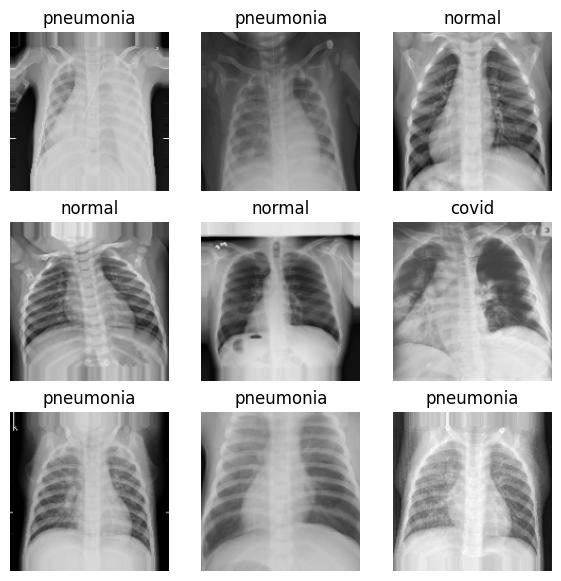

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generate augmented images from the training set
augmented_images = datagen.flow_from_directory(
    data_train,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=64
)

# Get the label names
label_names = list(augmented_images.class_indices.keys())

# Display some augmented images with labels
fig, axes = plt.subplots(3, 3, figsize=(7, 7))

for i, ax in enumerate(axes.flat):
    image, label = augmented_images.next()
    ax.imshow(image[0])
    ax.set_title(label_names[np.argmax(label[0])])
    ax.axis('off')

plt.show()

In [21]:


base_model = VGG16(input_shape = (150, 150, 3), 
                          include_top = False, 
                          weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

In [22]:
from tensorflow.keras import Model
from tensorflow.keras import layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation ='relu')(x)
x = layers.Dense (3, activation = 'softmax')(x)

model = Model (base_model.input, x)

In [23]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    epochs = 20,
    steps_per_epoch=72,
    validation_data = test_generator,
    verbose = 1,
    validation_steps=15
) 

Epoch 1/20
72/72 [==============================] - 633s 9s/step - loss: 0.5449 - accuracy: 0.7892 - val_loss: 0.3316 - val_accuracy: 0.8646
Epoch 2/20
72/72 [==============================] - 704s 10s/step - loss: 0.2625 - accuracy: 0.9013 - val_loss: 0.2534 - val_accuracy: 0.8990
Epoch 3/20
72/72 [==============================] - 765s 11s/step - loss: 0.2219 - accuracy: 0.9190 - val_loss: 0.2644 - val_accuracy: 0.8906
Epoch 4/20
72/72 [==============================] - 819s 11s/step - loss: 0.1859 - accuracy: 0.9306 - val_loss: 0.2324 - val_accuracy: 0.9104
Epoch 5/20
72/72 [==============================] - 862s 12s/step - loss: 0.1662 - accuracy: 0.9437 - val_loss: 0.2830 - val_accuracy: 0.8906
Epoch 6/20
72/72 [==============================] - 860s 12s/step - loss: 0.1428 - accuracy: 0.9494 - val_loss: 0.3236 - val_accuracy: 0.8687
Epoch 7/20
72/72 [==============================] - 861s 12s/step - loss: 0.1427 - accuracy: 0.9455 - val_loss: 0.3973 - val_accuracy: 0.8438
Epoch 8

In [27]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

In [10]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [11]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-06-01 08:08:22.882595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-01 08:08:22.882663: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [44]:
tf.saved_model.save(model, LUNGCARE_TEMP_MODEL)

NameError: name 'LUNGCARE_TEMP_MODEL' is not defined

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(LUNGCARE_TEMP_MODEL)

In [ ]:
tflite_model = converter.convert()
tflite_model_file= 'converted_model.tflite'

In [23]:
export_dir = 'D:/Backup/Bangkit/main_model'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:/Backup/Bangkit/main_model\assets


In [25]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('D:/Backup/Bangkit/tflite_model')
tflite_model_file.write_bytes(tflite_model)

63067860

In [1]:
from tensorflow.keras.models import load_model

# Specify the path to the saved model
model_path = 'G:/Lung/Model/New folder/1685581692.h5'

# Load the saved model
model = load_model(model_path)

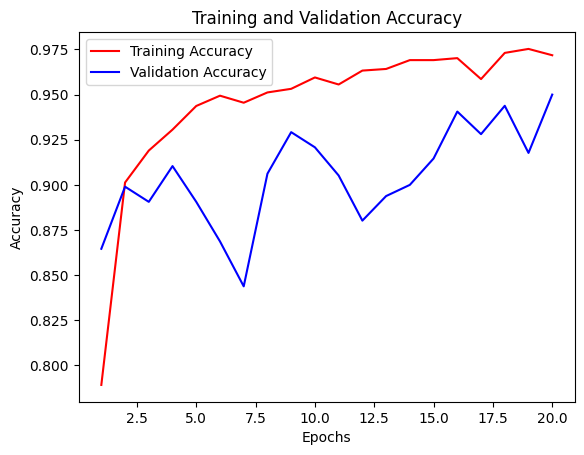

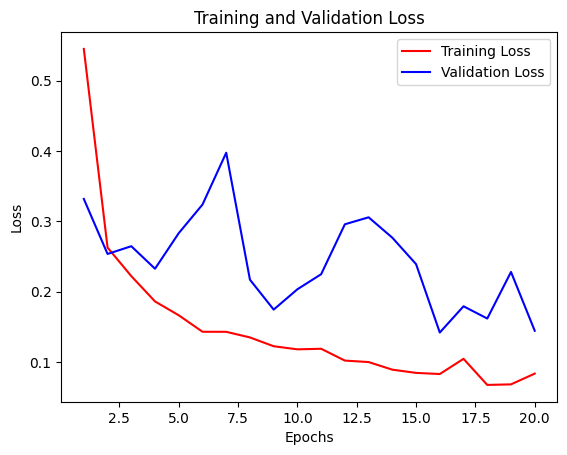

In [39]:
import matplotlib.pyplot as plt

# Training history
loss = [0.5449, 0.2625, 0.2219, 0.1859, 0.1662, 0.1428, 0.1427, 0.1347, 0.1222, 0.1178, 0.1186, 0.1018, 0.0997, 0.0889, 0.0843, 0.0827, 0.1043, 0.0672, 0.0680, 0.0833]
accuracy = [0.7892, 0.9013, 0.9190, 0.9306, 0.9437, 0.9494, 0.9455, 0.9512, 0.9532, 0.9595, 0.9556, 0.9633, 0.9642, 0.9691, 0.9691, 0.9702, 0.9586, 0.9731, 0.9753, 0.9718]
val_loss = [0.3316, 0.2534, 0.2644, 0.2324, 0.2830, 0.3236, 0.3973, 0.2168, 0.1743, 0.2032, 0.2246, 0.2956, 0.3055, 0.2765, 0.2389, 0.1417, 0.1790, 0.1616, 0.2278, 0.1442]
val_accuracy = [0.8646, 0.8990, 0.8906, 0.9104, 0.8906, 0.8687, 0.8438, 0.9062, 0.9292, 0.9208, 0.9052, 0.8802, 0.8938, 0.9000, 0.9146, 0.9406, 0.9281, 0.9438, 0.9177, 0.9500]

# Plotting
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

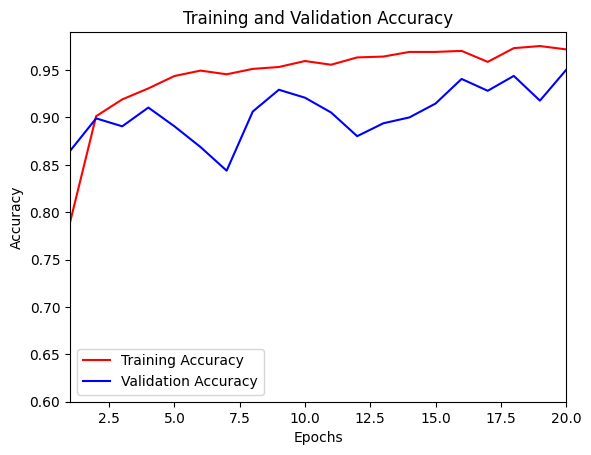

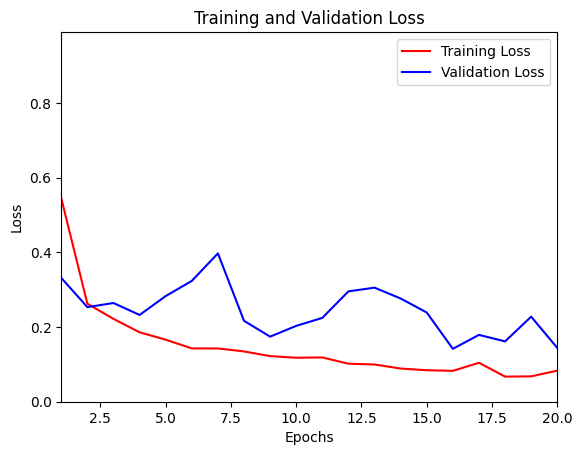

In [42]:
import matplotlib.pyplot as plt

# Training history
loss = [0.5449, 0.2625, 0.2219, 0.1859, 0.1662, 0.1428, 0.1427, 0.1347, 0.1222, 0.1178, 0.1186, 0.1018, 0.0997, 0.0889, 0.0843, 0.0827, 0.1043, 0.0672, 0.0680, 0.0833]
accuracy = [0.7892, 0.9013, 0.9190, 0.9306, 0.9437, 0.9494, 0.9455, 0.9512, 0.9532, 0.9595, 0.9556, 0.9633, 0.9642, 0.9691, 0.9691, 0.9702, 0.9586, 0.9731, 0.9753, 0.9718]
val_loss = [0.3316, 0.2534, 0.2644, 0.2324, 0.2830, 0.3236, 0.3973, 0.2168, 0.1743, 0.2032, 0.2246, 0.2956, 0.3055, 0.2765, 0.2389, 0.1417, 0.1790, 0.1616, 0.2278, 0.1442]
val_accuracy = [0.8646, 0.8990, 0.8906, 0.9104, 0.8906, 0.8687, 0.8438, 0.9062, 0.9292, 0.9208, 0.9052, 0.8802, 0.8938, 0.9000, 0.9146, 0.9406, 0.9281, 0.9438, 0.9177, 0.9500]

# Plotting
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(1, 20)  # Set x-axis range to 1-20
plt.ylim(0.6, 0.99)  # Set y-axis range to 0.40-0.99
plt.legend()
plt.show()

# Loss plot
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1, 20)  # Set x-axis range to 1-20
plt.ylim(0.0, 0.99)  # Set y-axis range to 0.40-0.99
plt.legend()
plt.show()

1/1 [==============================] - 1s 534ms/step
detection_scores:
Covid = 0 %
Normal = 0 %
Pneumonia = 99 %
[[1.5637206e-05 2.0851047e-07 9.9998415e-01]]


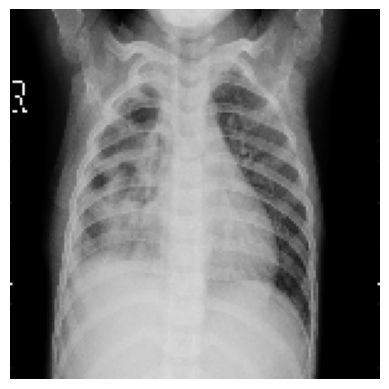

In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def detect_classes(classes):
    print("detection_scores:")
    print(f"Covid = {int(classes[0] * 100)} %")
    print(f"Normal = {int(classes[1] * 100)} %")
    print(f"Pneumonia = {int(classes[2] * 100)} %")

path = 'E:/Lung/val/PNEUMONIA/person1954_bacteria_4886.jpeg'
img = load_img(path, target_size=(150,150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=64)
detect_classes(classes[0])
print(classes)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 138ms/step
detection_scores:
Covid = 0 %
Normal = 0 %
Pneumonia = 99 %
[[1.8304485e-04 9.3640192e-06 9.9980766e-01]]


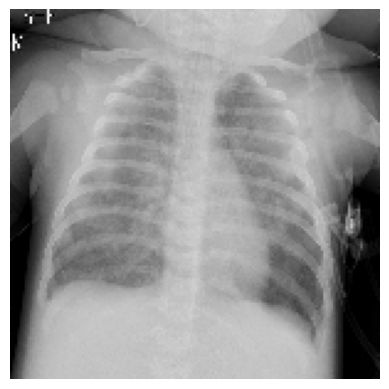

1/1 [==============================] - 0s 135ms/step
detection_scores:
Covid = 99 %
Normal = 0 %
Pneumonia = 0 %
[[9.9938774e-01 6.0088251e-04 1.1339237e-05]]


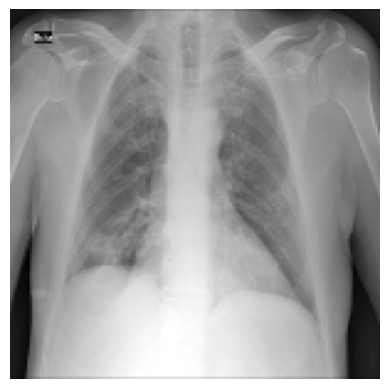

1/1 [==============================] - 0s 181ms/step
detection_scores:
Covid = 1 %
Normal = 98 %
Pneumonia = 0 %
[[1.4309709e-02 9.8569006e-01 2.5558816e-07]]


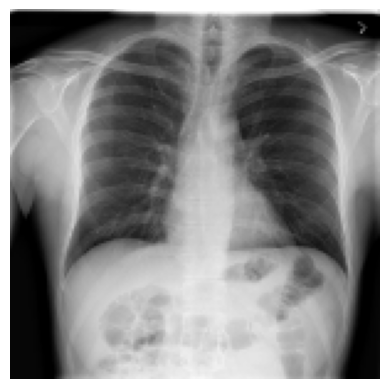

1/1 [==============================] - 0s 144ms/step
detection_scores:
Covid = 0 %
Normal = 99 %
Pneumonia = 0 %
[[1.1057058e-04 9.9988854e-01 8.6337843e-07]]


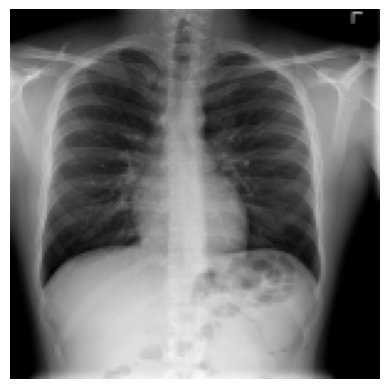

KeyboardInterrupt: 

In [6]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

def detect_classes(classes):
    print("detection_scores:")
    print(f"Covid = {int(classes[0] * 100)} %")
    print(f"Normal = {int(classes[1] * 100)} %")
    print(f"Pneumonia = {int(classes[2] * 100)} %")

def process_image(path):
    img = load_img(path, target_size=(150,150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=64)
    detect_classes(classes[0])
    print(classes)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def handle_upload():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_image(file_path)

# Create a Tkinter window
window = tk.Tk()

# Create an upload button
upload_button = tk.Button(window, text='Upload', command=handle_upload)
upload_button.pack()

# Start the Tkinter event loop
window.mainloop()

1/1 [==============================] - 0s 139ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[0.9924097  0.00543566 0.00215471]]


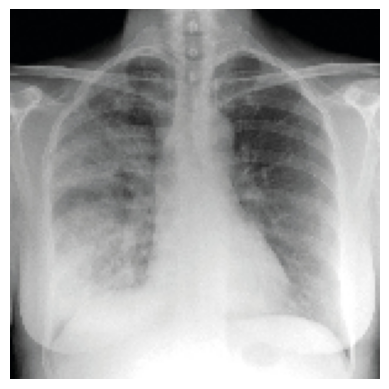

1/1 [==============================] - 0s 134ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[9.9986815e-01 1.8162789e-08 1.3179643e-04]]


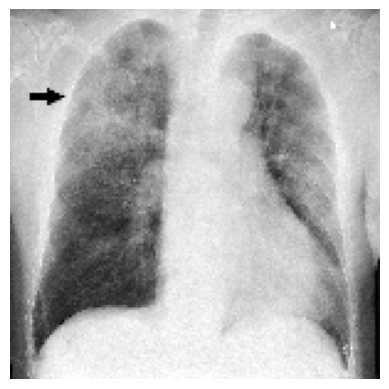

1/1 [==============================] - 0s 186ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[9.9935979e-01 6.4027461e-04 1.4292778e-10]]


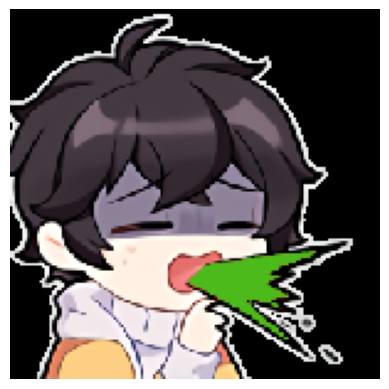

1/1 [==============================] - 0s 145ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[2.2468716e-04 9.9977416e-01 1.1891307e-06]]


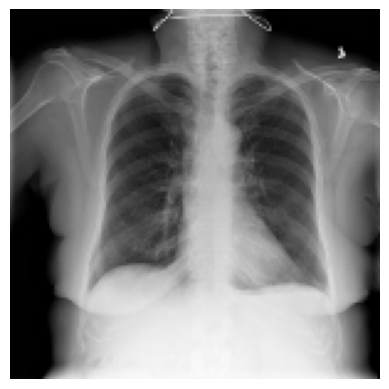

1/1 [==============================] - 0s 157ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[5.6071806e-04 9.9943370e-01 5.5990554e-06]]


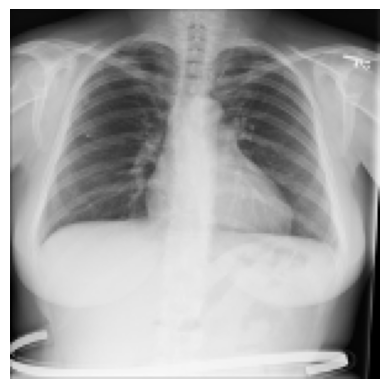

1/1 [==============================] - 0s 140ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[2.4633261e-03 9.9753582e-01 8.6893994e-07]]


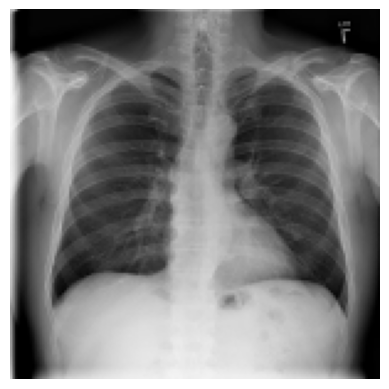

1/1 [==============================] - 0s 146ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[1.7480783e-03 9.9823076e-01 2.1194735e-05]]


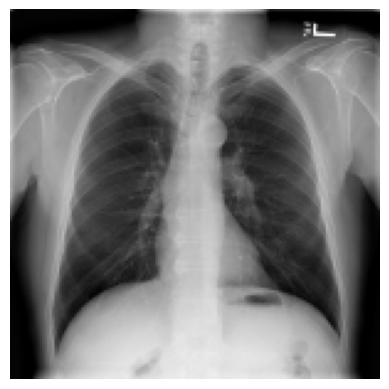

1/1 [==============================] - 0s 142ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[2.5411972e-03 9.9739325e-01 6.5554515e-05]]


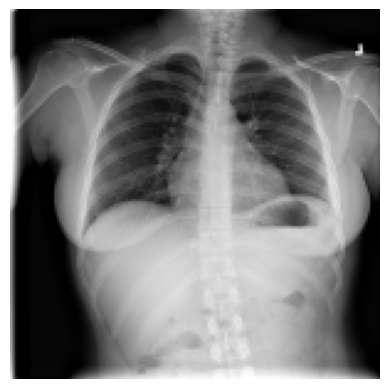

1/1 [==============================] - 0s 153ms/step
Detection scores:
Covid = 0%
Normal = 99%
Pneumonia = 0%
[[7.2799862e-04 9.9927193e-01 1.0317892e-07]]


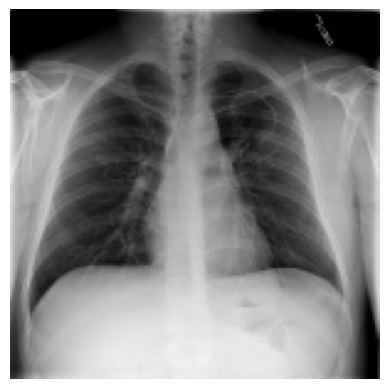

1/1 [==============================] - 0s 137ms/step
Detection scores:
Covid = 0%
Normal = 0%
Pneumonia = 99%
[[3.9375053e-08 5.4865558e-07 9.9999940e-01]]


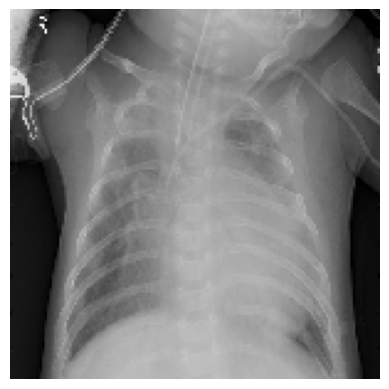

1/1 [==============================] - 0s 147ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[9.9975425e-01 3.4484674e-05 2.1130954e-04]]


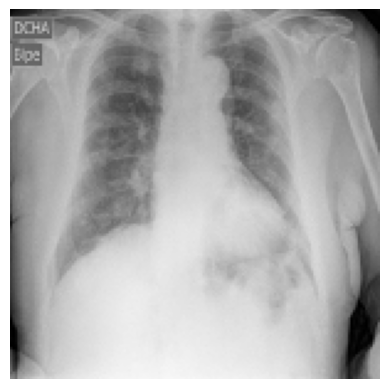

1/1 [==============================] - 0s 146ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[0.99404967 0.00486197 0.00108837]]


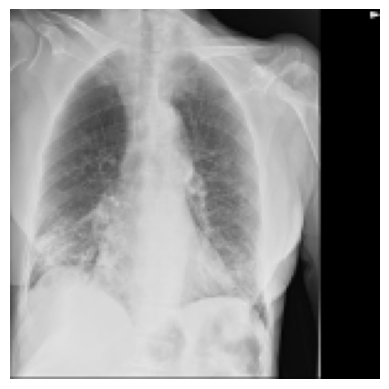

1/1 [==============================] - 0s 143ms/step
Detection scores:
Covid = 10%
Normal = 89%
Pneumonia = 0%
[[1.0351857e-01 8.9648134e-01 9.3732986e-08]]


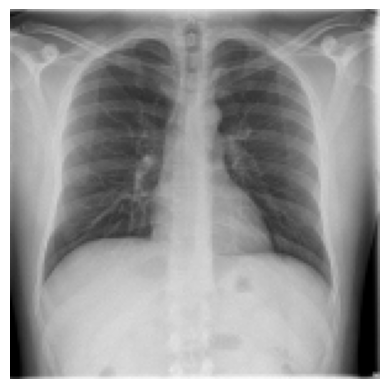

1/1 [==============================] - 0s 142ms/step
Detection scores:
Covid = 90%
Normal = 1%
Pneumonia = 8%
[[0.9016945  0.01184379 0.08646172]]


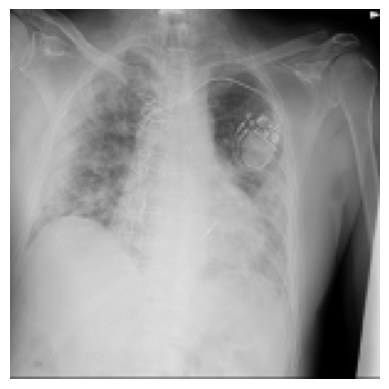

1/1 [==============================] - 0s 155ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[9.9628961e-01 3.7099891e-03 3.4427262e-07]]


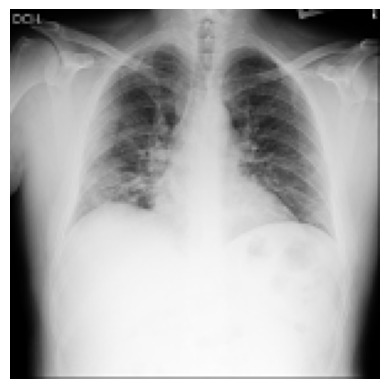

1/1 [==============================] - 0s 140ms/step
Detection scores:
Covid = 99%
Normal = 0%
Pneumonia = 0%
[[9.9638188e-01 3.4222547e-03 1.9588185e-04]]


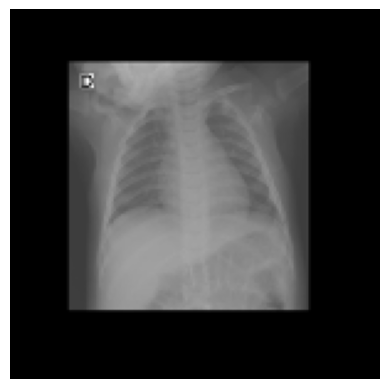

1/1 [==============================] - 0s 143ms/step
Detection scores:
Covid = 21%
Normal = 78%
Pneumonia = 0%
[[2.1718666e-01 7.8280610e-01 7.2476782e-06]]


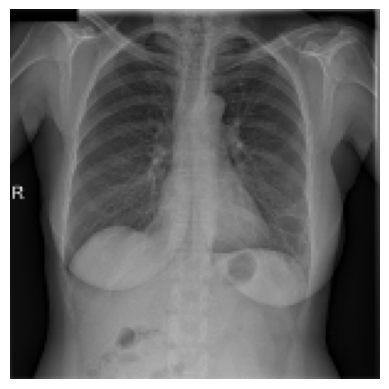

In [3]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def detect_classes(classes):
    print("Detection scores:")
    print(f"Covid = {int(classes[0] * 100)}%")
    print(f"Normal = {int(classes[1] * 100)}%")
    print(f"Pneumonia = {int(classes[2] * 100)}%")

def process_image(path):
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=64)
    detect_classes(classes[0])
    print(classes)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def handle_upload():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_image(file_path)

def quit_program():
    window.quit()
    window.destroy()

# Create a Tkinter window
window = tk.Tk()
window.geometry("600x400")  # Set the size of the window

# Create an upload button
upload_button = tk.Button(window, text='Upload', command=handle_upload)
upload_button.pack()

# Create a quit button
quit_button = tk.Button(window, text='Quit', command=quit_program)
quit_button.pack()

# Start the Tkinter event loop
window.mainloop()